# Newton's Method
#### Breanna Guo

### Abstract
In this blog post, I implement Newton's method of optimization for logistic regression. Newton's method builds off of logistic regression to implement a faster model. It is a second-order optimization techniques, which means it requires information about the first and second derivates of the loss function L.

After computing the usual gradient $\nabla L(w)$, compute the Hessian matrix of L

Once the gradient and Hessian have been calculated, repeat the update 

$w \leftarrow w - \alpha H(w)^{-1} \nabla L(w)$

until convergence, where $\alpha > 0$ is the learning rate and  $H(w)^{-1}$ is the matrix inverse of the Hessian.

I implement Newton's optimizer using my previous Logistic Regression model. To test the abilities and limitations of this method, I run some experiments to find an optimal $\alpha$ so that Newton's method works better than Grad Descent, and such that Newton's method does not work. I also calculate the computational cost of both methods and compare them.

In [34]:
%load_ext autoreload
%autoreload 2
from Optimizer import LogisticRegression, NewtonOptimizer, GradientDescentOptimizer
from matplotlib import pyplot as plt
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Part B
### Performing Experiments

Show that:

* When $\alpha$ is chosen appropriately, Newton's method converges to correct **w**
* In certain cases, Newton's method converges much quicker than standard gradient descent
* If $\alpha$ is too large, Newton's method won't converge

First, generating some data

In [35]:
# The following code to create data points was prepared by Prof. Chodrow for the logistic regression blog post
def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

X, y = classification_data(noise = 0.5)

Plotting the data for a visual

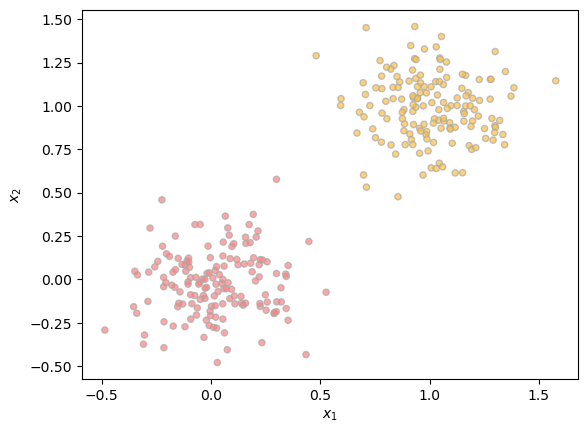

In [36]:
def plotData(X, y, ax):
    targets = [0, 1]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "spring", vmin = -2, vmax = 2, alpha = 0.7)
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")
    
X, y = classification_data(noise = 0.2)
fig, ax = plt.subplots(1,1)

plotData(X,y,ax)

### 1. Chosing appropriate $\alpha$

In [4]:
# initializing the methods
LR = LogisticRegression() 
opt = NewtonOptimizer(LR)

In [6]:
#initalize vector to keep track of loss over iterations
loss_vec = []
max_iters = 5000
curr_iter = 0
alpha = 0.25
loss = LR.loss(X,y)

while curr_iter <  max_iters and loss > 0:
    opt.step(X, y, alpha)
    loss = LR.loss(X, y)
    loss_vec.append(loss)

    curr_iter +=1


In [7]:
def plot_loss_fnc(loss):
    plt.plot(loss)
    plt.gca().set(xlabel = "Iteration", ylabel = "Loss")
    plt.title("Logistic Regression Loss over " + str(curr_iter) + " Iterations")

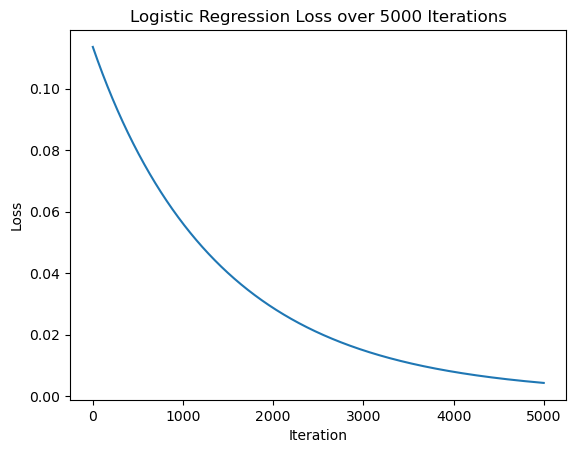

In [8]:
plot_loss_fnc(loss = loss_vec)

Over 5000 iterations, the loss eventually reduces to 0

In [9]:
# function to draw decision boundary
def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)

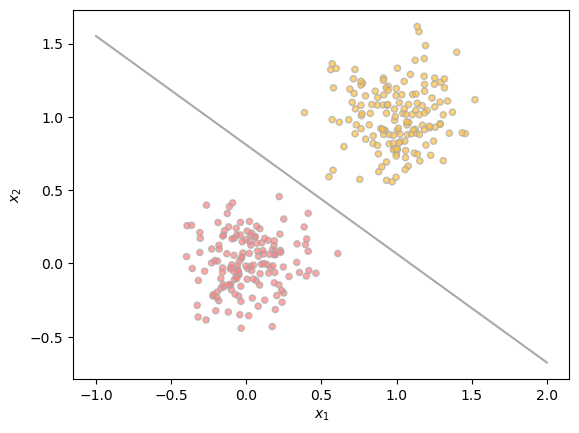

In [10]:
fig, ax = plt.subplots(1,1)
plotData(X, y, ax)
draw_line(LR.w, x_min=-1, x_max=2, ax=ax, color="darkgrey")

The decision boundary appears to split the data perfectly.

### 2. Does it converge quicker than gradient descent

In [11]:
# initializing the newton methods
LR = LogisticRegression() 
opt = NewtonOptimizer(LR)

#initalize vector to keep track of loss over iterations
loss_vec = []
max_iters = 5000
curr_iter = 0
alpha = 10
loss = LR.loss(X,y)

while curr_iter <  max_iters and loss > 0:
    opt.step(X, y, alpha)
    loss = LR.loss(X, y)
    loss_vec.append(loss)

    curr_iter +=1

In [12]:
LR = LogisticRegression()
gradDesc = GradientDescentOptimizer(LR)

#initalize vector to keep track of loss over iterations
loss_vec_gd = []

iterations = 5000
for iter in range(iterations):
    gradDesc.step(X, y, alpha, beta = 0)
    loss_gd = LR.loss(X, y).item()
    loss_vec_gd.append(loss_gd)

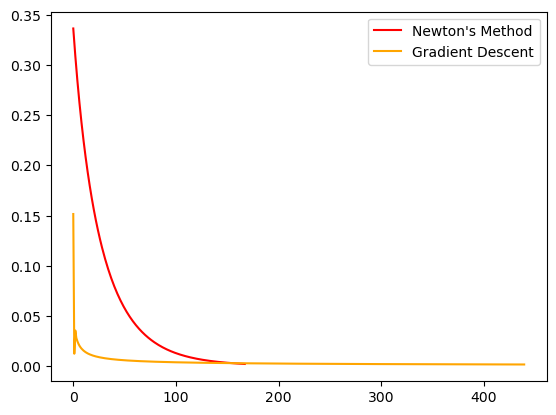

In [13]:
plt.plot(loss_vec, color = "red", label = "Newton's Method")
plt.plot(loss_vec_gd, color = "orange", label = "Gradient Descent")
plt.legend()

When I set alpha to 10, the newton's method loss function reaches 0 at around 170 iterations, while the gradeint descent optimizer take just over 400 iterations

### 3. Large $\alpha$ means Newton's method fails to converge

In [37]:
# initializing the newton methods
LR = LogisticRegression() 
opt = NewtonOptimizer(LR)

#initalize vector to keep track of loss over iterations
loss_vec_biga = []
max_iters = 5000
curr_iter = 0
alpha = 1000
loss_biga = LR.loss(X,y)

while curr_iter <  max_iters and loss > 0:
    opt.step(X, y, alpha)
    loss_biga = LR.loss(X, y)
    loss_vec_biga.append(loss_biga)

    curr_iter +=1

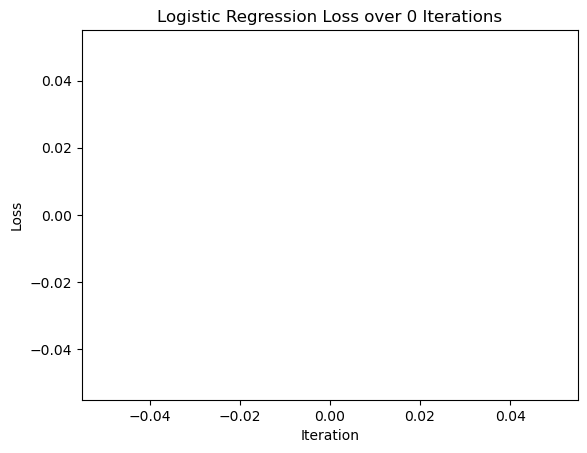

In [38]:
plot_loss_fnc(loss = loss_vec_biga)

Somehting might be wrong here...

### Part C
#### Calculate the computation cost of Newton's method comapred to gradient descent

It costs *c* computational unite to compute loss L, 
*2c* to compute gradient $\nabla L$, and 
*pc* units to compute Hessian. 
Costs $k_1p^{\gamma}$ to invert $p x p$ matrix and
$k_2p^2$ units to perform matrix vector multiplication

Suppose Newton's method converges in $t_{nm}$ steps while gradient descent converges in $t_{gd}$ steps. How much smaller must $t_{nm}$ be to make using Newton's method worth it? If p becomes really large, will using Newton's ever be worth it?

For a single step in Newton's:

$O(Newton's) = c + t_{nm}*(2c + pc + k_1p^{\gamma} + k_2p^{\gamma})$

For a single step in Gradient descent:

$O(Gradient) = c + t_{gd} * 2c$

So for 

$t_{nm} < t_{gd}$ , $t_{nm}$ must be scalar $(1 + p/2 + (k_1p^{\gamma})/(2c) + (k_2p^{\gamma})/(2c))$ less than $t_{gd}$

If $p$ were to grow significantly, the scalar on $t_{nm}$ to be smaller than $t_{gd}$ would grow, which means the computational cost of $t_{nm}$ would need to be smaller and smaller, and it $p$ if ever such that  $(1 + p/2 + (k_1p^{\gamma})/(2c) + (k_2p^{\gamma})/(2c)) > t_{gd}$, it would be impossible for $t_{nm}$ to be smaller than $t_{gd}$

### Discussion

In this blog post, I learned of a new way to improve logisitic regression. With the right $\alpha$ value, Newton's method of optimization is able to improve the models ability and converge more quickly than Gradient Descent optimization. Unfortunately, the computational cost of calculating the Hessian makes the Newton's method not always the best choice.